In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab09.ipynb")

# Lab 09: Probability and Modeling
In this lab, you will

1. Explore properties of random variables through the example of binomial distribution.
1. Explore Central Limit Theorem (CLT) by simulation. 
1. Explore if the "sample maximum" is a biased estimator for the true maximum of a population.

### Due Date

The on-time deadline is **Tuesday, March 21st, 11:59 PM PT**. Please read the syllabus for the grace period policy. No late submissions beyond the grace period will be accepted.

### Lab Walk-Through
In addition to the lab notebook, we have also released a prerecorded walk-through video of the lab. We encourage you to reference this video as you work through the lab. Run the cell below to display the video.

**Note**: The walkthrough video is partially recorded from Spring 2022, where this lab was labeled Lab 10.

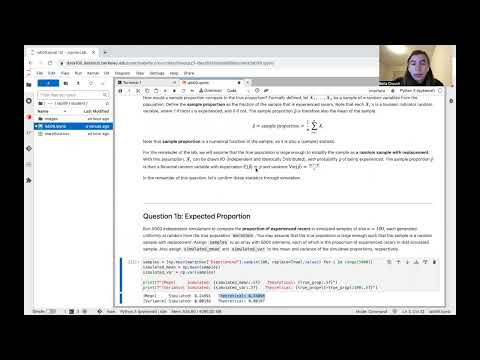

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("_K7OvmRbb5w")

### Collaboration Policy
Data science is a collaborative activity. While you may talk with others about this assignment, we ask that you **write your solutions individually**. If you discuss the assignment with others, please **include their names** in the cell below.

**Collaborators:** *list names here*

In [4]:
# Run this cell to set up your notebook
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from IPython.display import FileLink, FileLinks
FileLink('path_to_file/filename.extension')
%matplotlib inline
sns.set()
sns.set_context("talk")
import warnings
warnings.filterwarnings('ignore')

np.random.seed(2023) # Do not change this line; this sets the pseudorandomness of the autograder.

from IPython.display import display, Latex, Markdown

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Question 1: Probability with Binomial Random Variables

---

## Question 1a: Data Loading

Berkeley Half Marathon is an annual weekend-long race here in Berkeley. 

Suppose that you want to collect a sample of participants to understand how many individuals of your sample also participated in the previous year's race.

Let's first assume that we have access to the official data so we can simulate the potential result we might get (**in practice we don't!**). The dataset `marathon.csv` includes information for all racers who registered for the Berkeley Half Marathon. (Note: we artificially generated this data, but assume it is **the population data** as described). 

* The `Bib Number` of each participant (i.e., racer) is in order of registration — integers from $1$ to the total unknown number of participants. 
* The column `Race Type` denotes the type of race a participant is in.
* The column `Experienced` denotes if a participant participated in race in the previous year.
* The column `Dog Lover` denotes if a participant is a dog lover.

Load the dataset `marathon.csv` into the DataFrame `marathon` and assign `true_prop` to the true proportion of experienced racers. 

**Hint:** The true proportion of experienced racer is the proportion of experienced racer in the population. We call numerical function of the population such as true proportion of racer a population parameter. 

In [9]:
marathon = pd.read_csv("marathon.csv")
display(marathon.head())
true_prop = np.sum(marathon['Experienced'])/marathon.shape[0]
true_prop

,Bib Number,Race Type,Experienced,Dog Lover
0,1,10.0,False,False
1,2,5.0,False,False
2,3,1.0,False,False
3,4,10.0,False,True
4,5,10.0,False,False


0.24897500591342742

In [10]:
grader.check("q1a")

q1a results: All test cases passed!

Suppose that you have access to the official roster and are able to collect a Simple Random Sample (SRS) of 100 racers. You decided to use the proportion of experienced racers in your sample as an estimate of the true proportion of experienced racers in the population. 


How would a sample proportion compare to the true proportion? Formally defined, let $X_1, \dots, X_n$ be a sample of $n$ random variables from the population. Define the **sample proportion** as the fraction of the sample that is experienced racers. Note that each $X_i$'s is a boolean indicator random variable, where 1 if racer $i$ is experienced, and 0 if not. The sample proportion $\hat{p}$ is therefore also the mean of the sample.

$$\hat{p} = \text{sample proportion} = \frac{1}{n}\sum_{i=1}^{\text{n}} X_i$$

Note that **sample proportion** is a numerical function of the sample, so it is also a (sample) statistic. 


For the remainder of the lab, we will assume that the true population is large enough to simplify the sample as **a random sample with replacement.** With this assumption, $X_i$ can be drawn IID (Independent and Identically Distributed), with probability $p$ of being experienced. The sample proportion $\hat{p}$ is then a Binomial random variable with expectation $\mathbb{E}[\hat{p}] = p$ and variance $\text{Var}(\hat{p}) = \frac{p(1-p)}{n}$.

In the remainder of this question, let's confirm these statistics through simulation.

<br><br>

---

## Question 1b: Expected Proportion
Run 5000 independent simulations to compute the **proportion of experienced racers** in simulated samples of size $n = 100$, each generated uniformly at random from the true population `marathon`. You may assume that the true population is large enough such that the sample is a random sample with replacement. Assign `samples` to an array with 5000 elements, each of which is the proportion of experienced racers in that simulated sample. Also assign `simulated_mean` and `simulated_var` to the mean and variance of the simulated proportions, respectively.

In [13]:
samples = [np.mean(marathon['Experienced'].sample(100, replace=True).values) for i in range(5000)]
simulated_mean = np.mean(samples)
simulated_var = np.var(samples)

print(f"[Mean]     Simulated: {simulated_mean:.5f}   Theoretical: {true_prop:.5f}")
print(f"[Variance] Simulated: {simulated_var:.5f}   Theoretical: {true_prop*(1-true_prop)/100:.5f}")

[Mean]     Simulated: 0.24991   Theoretical: 0.24898
[Variance] Simulated: 0.00189   Theoretical: 0.00187


In [14]:
grader.check("q1b")

q1b results: All test cases passed!

<br><br>

What is a better way to support racers than passing out dog photos? :-) You decide to take a sample of size $n = 100$, where each racer will receive 1 dog photo if they are an experienced racer, 3 dog photos if they love dogs, and 4 dog photos if they are both an experienced racer and love dogs. What is the expected number of photos you need to print? 

Again, assume that the true population is large enough such that the sample is a random sample with replacement to simplify the problem, and that whether a racer loves dog and whether the racer participated in the previous year are independent. 

It can then be derived that the **expected number of photos** is: 
$$\large 100 \cdot p + 100 \cdot 3 \cdot q,$$ 
where $p$ is the true proportion of experienced racers and $q$ is the true proportion of dog lovers. This result follows from linearity of expectation:

$$\mathbb{E}[aX+bY] = a \mathbb{E}[X] + b\mathbb{E}[Y].$$

The variance of the number of photos is:
$$\large 100 \cdot p (1- p)+ 100 \cdot 3^2 \cdot q (1- q),$$
which follows from the properties of variance and that the two samples are independent: 

$$\text{Var}(aX+bY) = a^2\text{Var}(X) + b^2\text{Var}(Y) + 2 \cdot a \cdot b \text{Cov}(X, Y) = a^2\text{Var}(X) + b^2\text{Var}(Y).$$


<br><br>

---

## Question 1c: Expectation and Variance of Linear Combination of Random Variables

Confirm this result through simulation. Run 5000 independent simulations, where each simulation finds the number of **photos** needed for a sample of size $n = 100$ racers, selected uniformly at random (with replacement) from the true population `marathon`.  Assign `photo_samples` to an array with 5000 elements, each of which is the number of **photos** needed for the simulated sample. 

**Note:** We have computed `prop_dog_lover`, the true proportion of dog lover racers for you, so that you can verify that your simulated statistics match the theoretical statistics.

In [23]:
prop_dog_lover = np.mean(marathon["Dog Lover"])

photo_samples = []
for i in range(5000):
    sample = marathon.sample(100, replace=True)
    n_photos = 1*np.sum(sample['Experienced']) + 3*np.sum(sample['Dog Lover'])
    photo_samples.append(n_photos)

simulated_photos_mean = np.mean(photo_samples)
simulated_photos_var = np.var(photo_samples)


print(f"[Mean]     Simulated: {simulated_photos_mean:.5f}    Theoretical: {(true_prop + 3*prop_dog_lover)*100:.5f}")
print(f"[Variance] Simulated: {simulated_photos_var:.5f}   Theoretical: {100*true_prop*(1-true_prop) + 900*prop_dog_lover*(1-prop_dog_lover):.5f}")

[Mean]     Simulated: 84.78240    Theoretical: 84.77687
[Variance] Simulated: 165.81625   Theoretical: 162.48136


In [24]:
grader.check("q1c")

q1c results: All test cases passed!

<br><br>
<hr style="border: 1px solid #fdb515;" />

# Question 2: Central Limit Theorem

Central limit theorem states that the distribution of the sample mean will converge to a normal distribution as sample size ($n$) goes to infinity. Let's see this in action!

<br><br>

---

## Question 2a
Complete the funtion `simulate`. The function `simulate` takes in one argument (`sample_size` the size of the sample) and returns a length 5000 list where each element is a proportion of experienced racers in a random sample of size `sample_size`. 

Then, use `simulate` to run 5000 independent simulations, where each simulation finds the proportion of **experienced racers** in a sample of size of 100, 500, and 1000 selected uniformly at random from the true population `marathon`. You may assume that the true population is large enough such that the sample is a random sample with replacement (note that in reality, our population is finite of size about 50k; this approximation becomes more inaccurate as our sample size grows larger). You should assign `samples100`, `samples500`, and `samples1000` each to arrays of 5000 elements with proportions of experienced racers of sample sizes **100**, **500**, and **1000**, respectively.

In [25]:
def simulate(sample_size):
    return [np.mean(marathon['Experienced'].sample(sample_size, replace=True).values) for i in range(5000)]

samples100 = simulate(100)
samples500 = simulate(500)
samples1000 = simulate(1000)

In [26]:
grader.check("q2a")

q2a results: All test cases passed!

<br><br>

---

## Question 2b

Recall that the normal distribution has a probability density function (pdf) of 
$$\large
N_\sigma(x, \mu) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2  \sigma ^2} \right)
$$

Complete the function `gaussian` which returns the pdf of a normal distribution with mean `mean`, variance of `var`, at locations `x`. Hint: This is very similar to `gaussian_kernel` from Lab 04!

In [27]:
def gaussian(mu, v, x):
    """
    Compute the Gaussian density estimate for values in x

    Args:
        mu: the mean/center of the gaussian distribution
        v: variance of the gussian distribution (width of the kernel)
        x: observation

    Returns:
        The smoothed estimate at values of x
    """    
    return 1/np.sqrt(2*np.pi*v)*np.exp(-(x-mu)**2/(2*v))

gaussian(0, 1, np.array([-1, 0, 1]))

array([0.24197072, 0.39894228, 0.24197072])

In [28]:
grader.check("q2b")

q2b results: All test cases passed!

<br><br>

---

## Question 2c

We are ready to demonstrate the Central Limit Theorem visually, by comparing simulated distributions of sample means to the normal distribution. We have provided the skeleton code of an interactive plot. Fill in the blanks below using the `simulate` and `gaussian` functions from previous parts of this question.

Then, in the cell below, describe the mean and spread of the sampling distribution, and how well they fit to the normal distribution as you increase sample size.

In [30]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

def f(sample_size):
    plt.figure(figsize=(10, 5))
    # Generate the simulated proportions
    sim_samples = simulate(sample_size)
    # Make a histogram plot of the simulated proportions. Set density to True and edgecolor to "none"
    plt.hist(sim_samples, density=True, edgecolor='none')
    x = np.linspace(0, 1, 1001)
    # We provided the mean and variance for you. If you are intersted in knowing how to calculate these, take Data 140!
    mean = true_prop
    var = true_prop*(1-true_prop)/sample_size
    # Compute the pdf of normal distribution of mean `mean` and variance `var` at locations x
    y = gaussian(mean, var, x)
    plt.plot(x, y, linewidth=1)
    plt.xlim(0, 1);
    plt.ylim(0, 35);
    plt.show()
interact(f, sample_size=(10, 1000, 10));

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


interactive(children=(IntSlider(value=500, description='sample_size', max=1000, min=10, step=10), Output()), _…

_As the sample size increases, the variance decreases. The mean generally stays the same and the distribution appears more normal as the sample size increases._

<!-- END QUESTION -->

<br><br>

<hr style="border: 1px solid #fdb515;" />

# Question 3: Estimator for Population Max


Now suppose that we do not have access to the official roster; instead, we only have one sample. Without the official roster, we do not know the population, and therefore do not know the total number of racers. However, we still want to estimate the total racers given an observed sample so we can prepare a dog photo for everyone. That is, we want to find an estimator for this population maximum.

Recall that the `Bib Number` of each participant (i.e., racer) is in order of registration—integers from $1$ to the total unknown number of participants. You decide to construct a sample by recording the bib number of every racer you see on the street in a given time period, and use the maximum bib number in your sample as an estimator for the true maximum bib number (i.e., total number of particpants, assuming everyone who registered participated). Assume that a racer's bib number has no relation to their racing experience, so that you are equally likely to see any of bib number in your sample.

**Is the sample maximum a good estimator for the population maximum?** We'll use simulation to explore in this part of the lab.

<br><br>

---

## Question 3a

Let's first again assume that we have access to the total number of participants (again, in practice we don't!). Find the **true population maximum** and assign it to `true_max`.

In [31]:
true_max = max(marathon['Bib Number'])
true_max

50732

In [32]:
grader.check("q3a")

q3a results: All test cases passed!

In [33]:
# Run this cell to see the summary statistics of Bib Number, no further action needed.
marathon.describe()

,Bib Number,Race Type
count,50732.000000,50732.000000
mean,25366.500000,13.223222
std,14645.211265,7.312977
min,1.000000,1.000000
25%,12683.750000,10.000000
50%,25366.500000,10.000000
75%,38049.250000,21.100000
max,50732.000000,21.100000


<br><br>

---

## Question 3b

How would a sample maximum compare to the true maximum? Let $X_1, \dots, X_n$ be a sample of $n$ random variables drawn IID (Independent and Identically Distributed) from the population. Define the **sample max** as the maximum value of the sample.

$$\text{sample max} = \max (X_1, \dots, X_n)$$


Recall from [Data 8](https://inferentialthinking.com/chapters/10/3/Empirical_Distribution_of_a_Statistic.html) that we can get the empirical distribution of a statistic by **simulating**, or repeatedly sampling from the population.
Suppose we compute the sample max as the **maximum bib number from observing the bib numbers of $n = 200$ random racers**. By repeating this process for many randomly selected samples, we get a simulated distribution of the sample max statistic.

Assign `sample_maxes` to an array that contains 5,000 simulated sample maxes from samples of size $n = 200$, each sampled randomly **with replacement** from the population `marathon`. (Side note: We sample with replacement because while it suggests that we could see the same racer multiple times in our sample, it allows us to assume each individual in our sample is drawn IID from the population.)

Some useful functions: `df.sample` ([link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)), `np.random.choice` ([link](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)). 



In [39]:
sample_maxes = []
for i in range(5000):
    sample = marathon['Bib Number'].sample(200, replace=True)
    sample_maxes.append(max(sample))

In [40]:
grader.check("q3b")

q3b results: All test cases passed!

<br><br>

---


## Question 3c

Plot the empirical distribution of the sample maximum that you generated in Question 3b. Your plot should look like the below plot. It should include both the average sample maximum and the true population maximum as vertical lines.

<img src='images/sample_max_dist.png' width="600px" />

Visualization/plotting tips:
* To plot a vertical line with specific linestyles, see the `plt.axvline` [documentation](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.axvline.html).
* To include a label in the legend, pass in `label=...` to the plot that you'd like to label ([example](https://matplotlib.org/3.5.1/gallery/pyplots/axline.html#sphx-glr-gallery-pyplots-axline-py)).


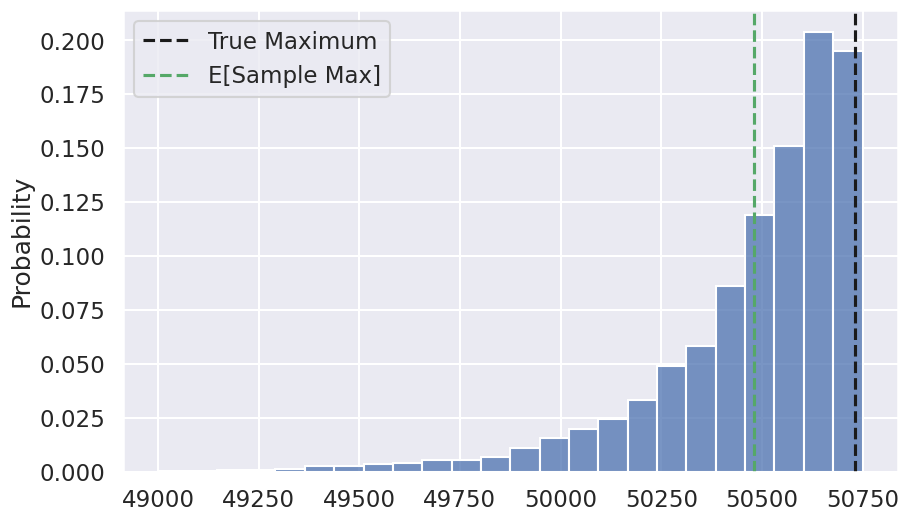

In [46]:
plt.figure(figsize = [10, 6])
bins = np.linspace(49000, 50750, 25) # For your plot

avg_sample_maxes = np.mean(sample_maxes)
sns.histplot(data=sample_maxes, stat='probability', bins=bins)
plt.axvline(x=true_max, color='k', linestyle='--', label='True Maximum');
plt.axvline(x=avg_sample_maxes, color='g', linestyle='--', label='E[Sample Max]');

plt.legend();     # Show legend

---

### Question 3d

Recall from [Spring 2023 Lecture 17](https://ds100.org/sp23/lecture/lec17/) that an **unbiased estimator** is one where the expected value of the estimator is the parameter. For example, the sample mean $\bar{X}_n$ is an unbiased estimator of the population mean $\mu$ because $\mathbb{E}[\bar{X}_n] = \mu$ by linearity of expectation.

Based on your analysis in Question 3c, assign `q3d` to the most correct option out of the following; then in the second cell, **explain your choice.**

1. The sample maximum is an unbiased estimator of the population maximum.
1. The sample maximum overestimates the population maximum.
1. The sample maximum underestimates the population maximum.


_The sample maximum underestimates the population maximum because the expected maximum is lower than the true population max._

In [47]:
q3d = 3

In [48]:
grader.check("q3d")

q3d results: All test cases passed!

<br><br>

## Food for thought (optional):

What if instead of the sample max, we use another estimator, $2\bar{X_n}-1$?  This is a common approach for this kind of uniform data; if you are interested, simulate and visualize the results for this estimator.

In [49]:
# your optional visualization here

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You are finished with Lab 09!

Here are some doggos photo as promised :) Stay tune for cat photos next week!

<img src='images/Bento.jpg' width="262px" /> <img src='images/Hera_Thor.jpg' width="398px" /> 
**(From left to right) Bento, Hera and Thor.**

<img src='images/Mazy_Bailey.jpg' width="455px" /> <img src='images/Junior.jpg' width="209px" /> 
**(From left to right) Mazy and Bailey, Junior.**



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...

